In [2]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv")

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    str    
 8   name          398 non-null    str    
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


In [6]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
df.isnull()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [8]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9488\1800950255.py:2: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

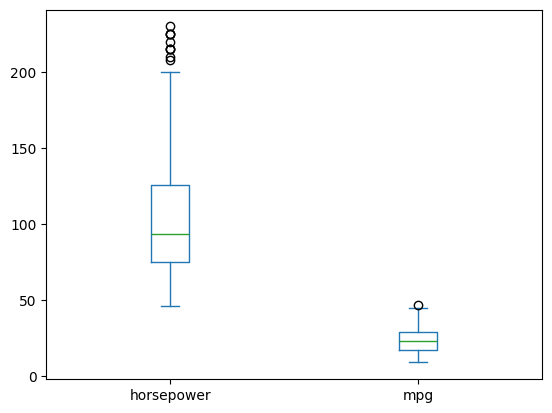

In [9]:
df[['horsepower', 'mpg']].plot(kind='box')
plt.show()

In [10]:
print("Duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Duplicates: 0


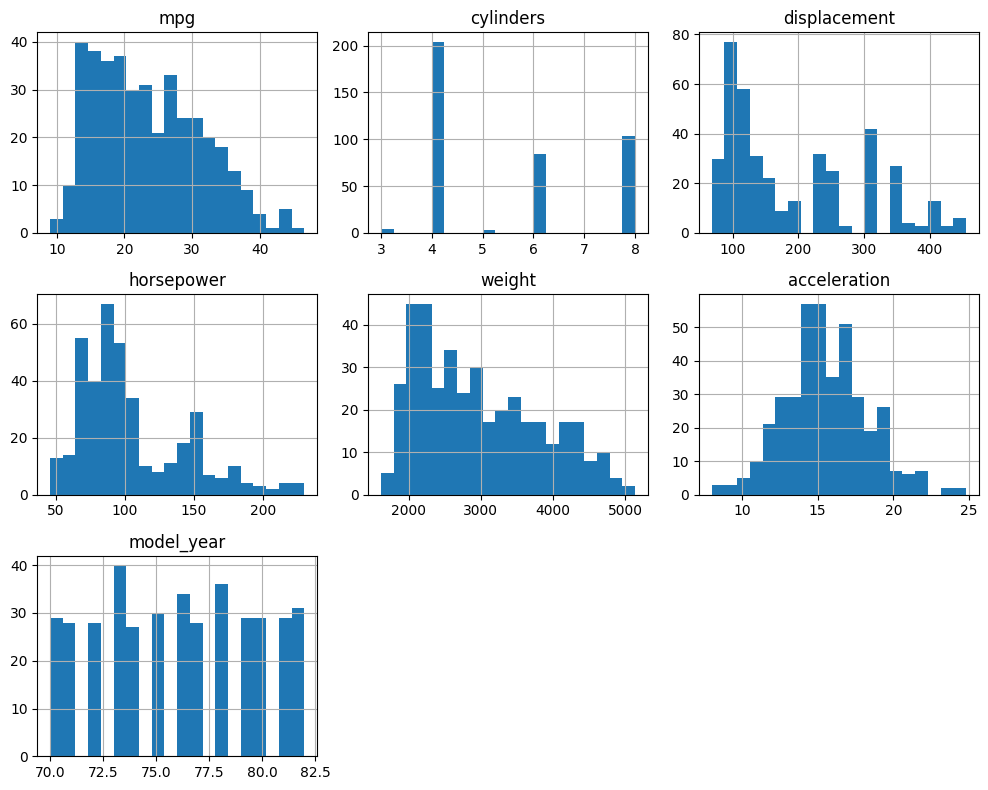

In [11]:
df.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()

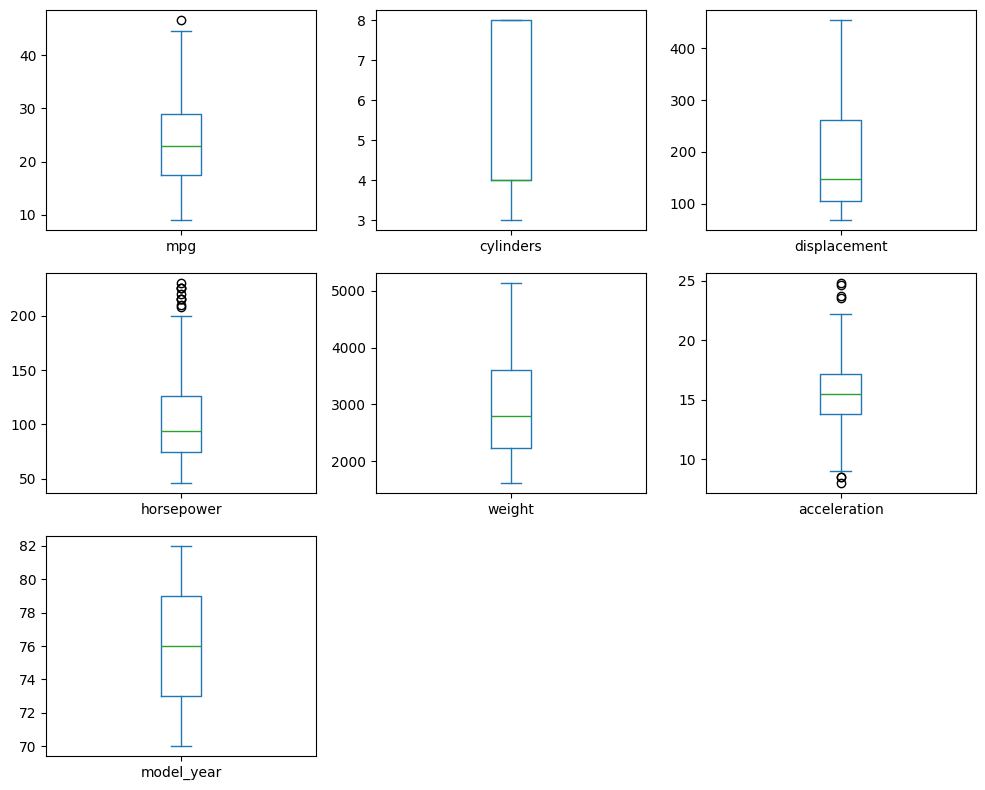

In [12]:
df.select_dtypes(include='number').plot(kind='box', subplots=True, layout=(3, 3), figsize=(10, 8))
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Clean + define features/target
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
data = df[['horsepower', 'mpg']].dropna()

X = data[['horsepower']]
y = data['mpg']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:


model = LinearRegression()
model.fit(X, y)

# predictions
y_pred_sklearn = model.predict(X)

print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

Intercept: 39.93586102117047
Slope: [-0.15784473]


In [15]:
import numpy as np

def linear_regression_numpy(x, y):
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    
    # Slope (b)
    b = (n * np.sum(x*y) - np.sum(x)*np.sum(y)) / \
        (n * np.sum(x**2) - (np.sum(x))**2)
    
    # Intercept (a)
    a = (np.sum(y) - b * np.sum(x)) / n
    
    return a, b

# Clean data first
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
data = df[['horsepower', 'mpg']].dropna()

x = data['horsepower'].values
y = data['mpg'].values

a, b = linear_regression_numpy(x, y)
print(f"y = {a:.4f} + {b:.4f}x")

# Predictions
y_pred = a + b * x
print(f"R2 Score: {1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2):.4f}")

y = 39.9359 + -0.1578x
R2 Score: 0.6059
